In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder

import keras
import os


In [ ]:
 df_path = '/content/output.csv'

 df = pd.read_csv(df_path)

In [ ]:
df.head()

,Unnamed: 0,Project,Country,Start,End,Budget,FindingSource (%),Category,TRL Start,TRL End,profit (%),Emissions decrease,Label
0,0,"Kohler, Wilkinson and Buckridge",Dominican Republic,9/20/2021,8/14/2024,$36399069.63,77.0,capture,2,3,-4,6.3,1
1,1,Smitham and Sons,China,8/3/2020,4/18/2024,$48806994.79,84.0,utilization,7,5,-6,1.5,0
2,2,"Jenkins, Huels and Zulauf",United States,1/5/2023,6/10/2024,$11548939.83,82.6,utilization,3,4,14,1.6,1
3,3,"Terry, Emmerich and Berge",Sweden,12/7/2021,12/4/2023,$17512435.77,71.1,utilization,6,3,7,7.1,0
4,4,"Padberg, Schamberger and Will",Philippines,3/19/2023,8/18/2024,$18929345.53,66.8,capture,4,7,0,6.9,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Project', 'Country', 'Start', 'End', 'Budget',
       'FindingSource (%)', 'Category', 'TRL Start', 'TRL End', 'profit (%)',
       'Emissions decrease', 'Label'],
      dtype='object')

In [ ]:
y = df['Label']
X = df.drop(columns=['Label'])

In [ ]:
X['Budget'] = X['Budget'].str.replace('$', '')
X['Budget'] = X['Budget'].astype(float)
label_encoder = LabelEncoder()
X['Category'] = label_encoder.fit_transform(X['Category'])
columns_to_drop = ['Unnamed: 0', 'Project', 'Country','Start','End','profit (%)','Emissions decrease']
X = X.drop(columns=columns_to_drop)

<ipython-input-23-419b1a5ca4ba>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X['Budget'] = X['Budget'].str.replace('$', '')


In [ ]:
X.head()

,Budget,FindingSource (%),Category,TRL Start,TRL End
0,36399069.63,77.0,2,2,3
1,48806994.79,84.0,3,7,5
2,11548939.83,82.6,3,3,4
3,17512435.77,71.1,3,6,3
4,18929345.53,66.8,2,4,7


from matplotlib import pyplot as plt
_df_12['Budget'].plot(kind='hist', bins=20, title='Budget')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['FindingSource (%)'].plot(kind='hist', bins=20, title='FindingSource (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Category'].plot(kind='hist', bins=20, title='Category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['TRL Start'].plot(kind='hist', bins=20, title='TRL Start')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Budget', y='FindingSource (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='FindingSource (%)', y='Category', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Category', y='TRL Start', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='TRL Start', y='TRL End', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Budget'].plot(kind='line', figsize=(8, 4), title='Budget')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['FindingSource (%)'].plot(kind='line', figsize=(8, 4), title='FindingSource (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Category'].plot(kind='line', figsize=(8, 4), title='Category')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['TRL Start'].plot(kind='line', figsize=(8, 4), title='TRL Start')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Budget,FindingSource (%),Category,TRL Start,TRL End
29,47769884.13,90.8,3,6,9
535,93919430.59,56.9,2,5,7
695,67885715.25,57.6,2,1,3
557,54733789.24,57.7,1,1,9
836,10289894.86,84.5,1,2,7
...,...,...,...,...,...
106,50508284.91,51.9,2,6,8
270,21268541.87,51.3,1,1,5
860,20244167.96,73.0,1,9,3
435,51114695.98,91.9,0,9,7


In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')
X_val = X_val.astype('float32')
y_val = y_val.astype('int32')

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 297723.7500 - accuracy: 0.5325 - val_loss: 230928.8438 - val_accuracy: 0.6500
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 107255.3203 - accuracy: 0.5350 - val_loss: 165512.5938 - val_accuracy: 0.6500
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 104256.5391 - accuracy: 0.5325 - val_loss: 170666.2656 - val_accuracy: 0.6500
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 104388.0625 - accuracy: 0.5450 - val_loss: 214686.4375 - val_accuracy: 0.6500
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 66206.3125 - accuracy: 0.5500 - val_loss: 9973.1494 - val_accuracy: 0.6500
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 114536.9531 - accuracy: 0.5150 - val_loss: 193096.1875 - val_accuracy: 0.6500
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 170336.8594 - accuracy: 0.5475

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


7/7 [==============================] - 0s 2ms/step - loss: 22456.7324 - accuracy: 0.6500
Validation Loss: 22456.7324
Validation Accuracy: 0.6500


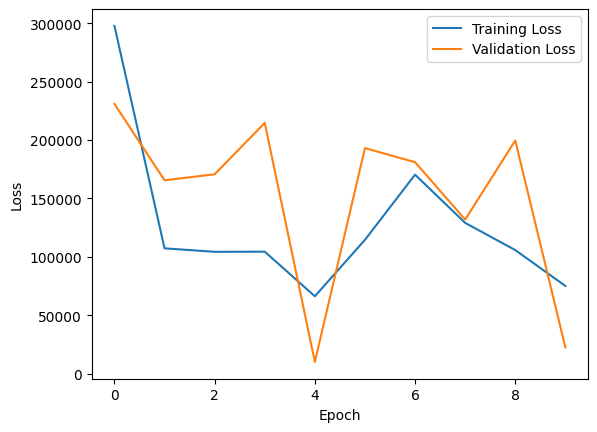

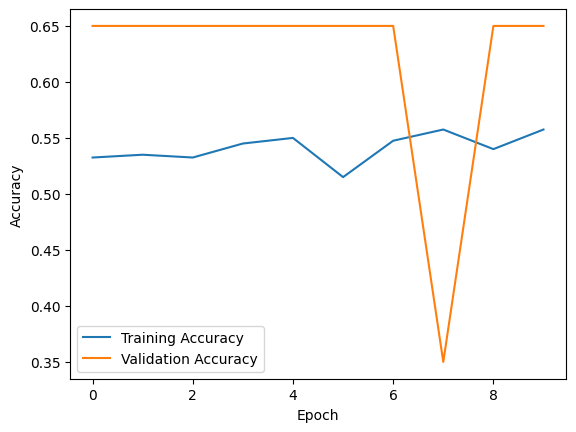

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
